# Question: What is the actual dimensionality of emotions

## ToDo

- [ ] z score data before and after concatenation and compare
- [ ] figure out what adding videos does for dimensionality (cumulative)
- [ ] plot data points on video histogram
- [ ] add increasing number of participants for dimensionality

In [1]:
import numpy as np
from nltools.data import Adjacency
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')
from scipy.stats import zscore

//anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
emotions = ['Afraid', 'Amused', 'Angry', 'Anxious', 'Bored', 'Disgusted',
       'Frustrated', 'Happy', 'Hopeful', 'Inspired', 'Moved', 'Proud',
       'Relieved', 'Sad', 'Surprised', 'Uncomfortable']

len(emotions)

16

In [3]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)
p_emo_summary = pd.DataFrame()

for emo in emotions: 
    df = pd.DataFrame()

    for stim in [1,2,3,4,5,6,7,9]: 
        df_add = pd.read_csv('../MothBehavioralAnalysis/out/cf_predictions/stim-%s_emo-%s_dilation-30.csv' % (stim, emo), index_col=0)
#         df_add = df_add.sub(df_add.mean(axis=1), axis=0) #Demean data
        df = pd.concat([df, df_add], axis=1, sort=False) #Concat
        
    df.dropna(inplace=True)
    df.iloc[:,:] = zscore(df, axis=1) # Z score data

    p_emo_summary = p_emo_summary.append(df)

In [4]:
qd = np.array([10,4,7,5,11,2,6,7])
qd.sort()
np.sum(qd)
len(qd)
np.mean(qd)

np.abs(qd-6.5)


# 4.5+2.5+1.5+.5+1.5+1.5+3.5+4.5

array([4.5, 2.5, 1.5, 0.5, 0.5, 0.5, 3.5, 4.5])

In [5]:
qe = np.array([7,12,14,15,17,19])
np.sum(qe) 


84

In [6]:
# Compute PCA for each emotion w/ n_components over 90%

n_component_count = []

for participant in list(set(p_emo_summary.index.values)): 
    p = p_emo_summary.loc[participant,:]
    p.index = emotions
    pca = PCA(n_components = .90)
    pca.fit(p)
    cum_sum = pca.explained_variance_ratio_.cumsum()
    n_components = len(pca.explained_variance_ratio_.cumsum())
    n_component_count.append(n_components)

In [7]:
pca.explained_variance_ratio_

array([0.19046711, 0.14607303, 0.12181564, 0.09440445, 0.08231969,
       0.0681867 , 0.06303061, 0.05521388, 0.04592928, 0.04191674])

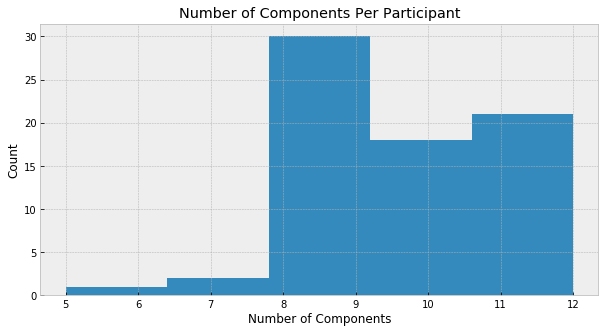

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

plt.hist(n_component_count, bins=5);
plt.title('Number of Components Per Participant')
plt.xlabel('Number of Components')
plt.ylabel('Count')

plt.savefig('./figures/Q2_Dimenionality_histogram.png')

In [9]:
np.array(n_component_count).std()

1.286204100310025

# Sparsely Sample Data (bad method, make faster)

In [10]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)

component_count_videos = []

for stim in [1,2,3,4,5,6,7,9]: 

    p_emo_summary = pd.DataFrame()

    for emo in emotions: 
        df = pd.DataFrame()


        df_add = pd.read_csv('../MothBehavioralAnalysis/out/cf_predictions/stim-%s_emo-%s_dilation-30.csv' % (stim, emo), index_col=0)
        df_add = df_add.sub(df_add.mean(axis=1), axis=0) #Demean data
        df = pd.concat([df, df_add], axis=1, sort=False) #Concat

        df.dropna(inplace=True)
        p_emo_summary = p_emo_summary.append(df)

    print(len(p_emo_summary))
    # Compute PCA for each emotion w/ n_components over 90%

    n_component_count = []

    for participant in list(set(p_emo_summary.index.values)): 
        p = p_emo_summary.loc[participant,:]
        p.index = emotions
        pca = PCA(n_components = .90)
        pca.fit(p)
        cum_sum = pca.explained_variance_ratio_.cumsum()
        n_components = len(pca.explained_variance_ratio_.cumsum())
        n_component_count.append(n_components)

    component_count_videos.append(np.array(n_component_count))


5840
6016
5760
5728
6400
6192
5632
5856


Text(0, 0.5, 'Mean number of components')

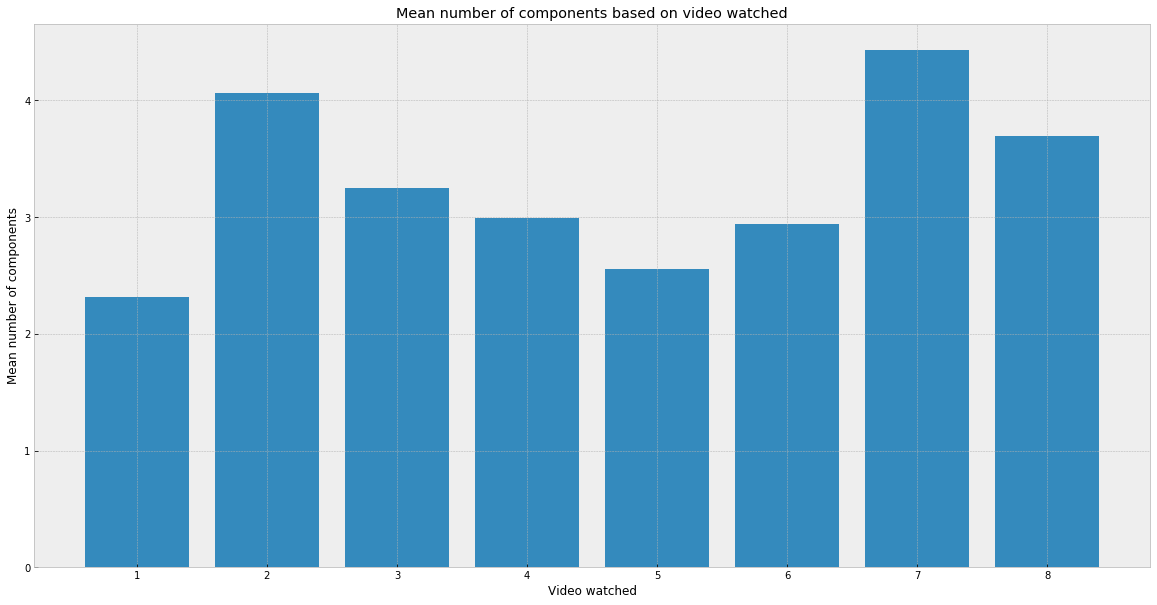

In [11]:
plt.figure(figsize=(20,10))

component_count_mean = []
for i in range(8):
    component_count_mean.append((np.mean(component_count_videos[i])))
plt.bar([1,2,3,4,5,6,7,8],component_count_mean)

plt.title("Mean number of components based on video watched")
plt.xlabel("Video watched")
plt.ylabel("Mean number of components")

In [12]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)
p_emo_summary = pd.DataFrame()

for emo in emotions: 
    df = pd.DataFrame()

    for stim in [1,2,3,4,5,6,7,9]: 
        df_add = pd.read_csv('../MothBehavioralAnalysis/out/cf_predictions/stim-%s_emo-%s_dilation-30.csv' % (stim, emo), index_col=0)
        df_add = df_add.sub(df_add.mean(axis=1), axis=0) #Demean data
        df = pd.concat([df, df_add], axis=1, sort=False) #Concat
        
    df.dropna(inplace=True)
    p_emo_summary = p_emo_summary.append(df)


In [13]:
selection = p_emo_summary.T

p = .7
random_choice = np.random.choice(a=[False, True], size=(len(selection), 1), p=[p, 1-p])

subset = selection[random_choice].T

In [14]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)

component_count_percentage = []

for p_n in range(5,100,5):

    percent = p_n/100
    selection = p_emo_summary.T
    random_choice = np.random.choice(a=[False, True], size=(len(selection), 1), p=[1-percent, percent])

    subset = selection[random_choice].T
    print(subset.shape)
    
    # Compute PCA for each emotion w/ n_components over 90%
    n_component_count = []

    for participant in list(set(p_emo_summary.index.values)): 
        p = subset.loc[participant,:]
        p.index = emotions
        pca = PCA(n_components = .90)
        pca.fit(p)
        cum_sum = pca.explained_variance_ratio_.cumsum()
        n_components = len(pca.explained_variance_ratio_.cumsum())
        n_component_count.append(n_components)

    component_count_percentage.append(np.array(n_component_count))


(1152, 242)
(1152, 489)
(1152, 730)
(1152, 987)
(1152, 1236)
(1152, 1451)
(1152, 1738)
(1152, 2032)
(1152, 2211)
(1152, 2445)
(1152, 2759)
(1152, 2960)
(1152, 3214)
(1152, 3512)
(1152, 3807)
(1152, 3965)
(1152, 4233)
(1152, 4463)
(1152, 4701)


Text(0, 0.5, 'Mean number of components')

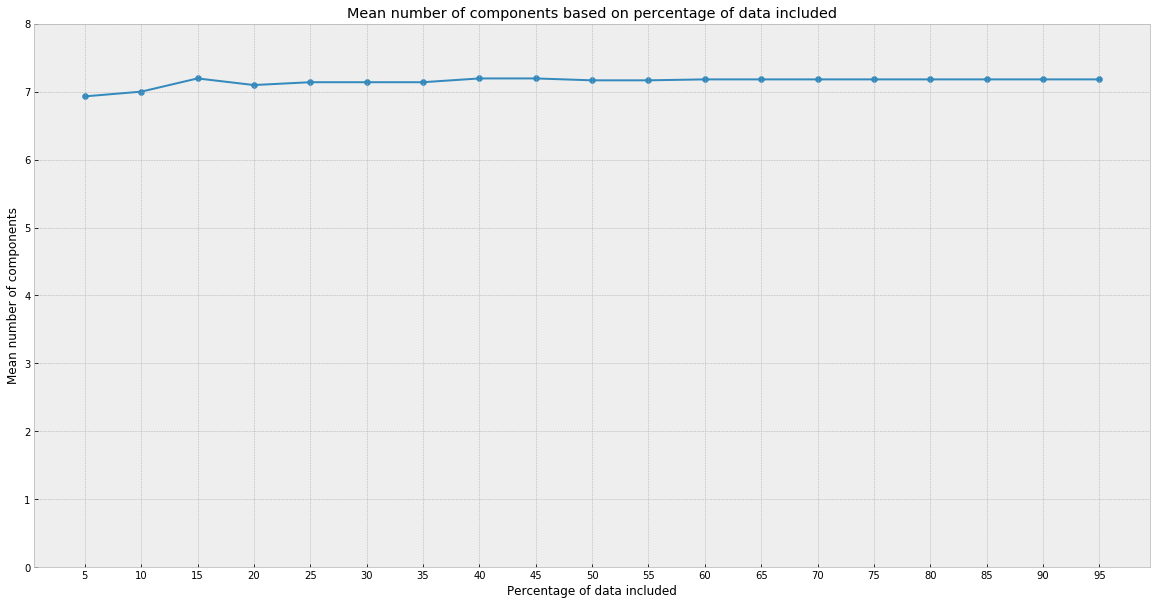

In [15]:
plt.figure(figsize=(20,10))

component_count_mean = []
component_count_std = []

for i in range(len(component_count_percentage)):
    component_count_mean.append((np.mean(component_count_percentage[i])))
    component_count_std.append(component_count_percentage[i].std())

plt.scatter(list(range(5,100,5)),component_count_mean)
plt.plot(list(range(5,100,5)),component_count_mean)

plt.ylim(0,8)
plt.xticks(range(5,100,5));
plt.title("Mean number of components based on percentage of data included")
plt.xlabel("Percentage of data included")
plt.ylabel("Mean number of components")